In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys, os
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import glob
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
move_all_path = glob.glob('/Users/Daigo/Desktop/移動と全部/compare*')
params_path = glob.glob('/Users/Daigo/Desktop/移動と全部/params*')

In [21]:
move_all_path[:5], params_path[:5]

(['/Users/Daigo/Desktop/移動と全部/compare_05mix.pkl',
  '/Users/Daigo/Desktop/移動と全部/compare_10mix.pkl',
  '/Users/Daigo/Desktop/移動と全部/compare_20mix.pkl'],
 ['/Users/Daigo/Desktop/移動と全部/params_05mix_00batch.pkl',
  '/Users/Daigo/Desktop/移動と全部/params_05mix_01batch.pkl',
  '/Users/Daigo/Desktop/移動と全部/params_05mix_02batch.pkl',
  '/Users/Daigo/Desktop/移動と全部/params_05mix_03batch.pkl',
  '/Users/Daigo/Desktop/移動と全部/params_05mix_04batch.pkl'])

In [22]:
compares = list()
paramss = list()

for m_a_path in move_all_path:
    with open(m_a_path, 'rb') as f:
        compares.append(pickle.load(f))
        
for param_path in params_path:
    with open(param_path, 'rb') as f:
        paramss.append(pickle.load(f))


In [24]:
compares[0].shape

(71, 3)

In [25]:
df = pd.DataFrame(columns=['objective', 'set_num','mixture', 'method'])

mix_list = [5, 10, 20]

for mix, compare in zip(mix_list, compares):
    for set_num in range(compare.shape[0]):
        for method in range(compare.shape[1]):
            
            if method == 0:
                meth = 'all'
            elif method == 1:
                meth = 'move_only'
            elif method == 2:
                meth = 'min'
                
            df2 = pd.DataFrame([[compare[set_num, method], np.int(set_num), mix, meth]], columns=df.columns)
                
            df = df.append(df2, ignore_index=True)

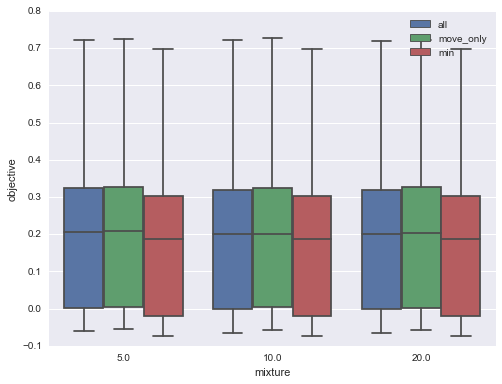

In [74]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(x = 'mixture', y = 'objective', data = df, hue='method')
sns.plt.legend(loc="upper right")
sns.plt.savefig('/Users/Daigo/Desktop/移動と全部/compare_move_all.png')

In [54]:
paramss[0]['f'].shape

(3, 30, 30)

In [68]:
def vis_move(paramss_child):
    
    frame = paramss_child['f'][0]
    
    mus_all = paramss_child['model_all'].params['mus']
    moves_all = paramss_child['model_all'].params['move']
    
    mus_move = paramss_child['model_move'].params['mus']
    moves_move = paramss_child['model_move'].params['move']
    
    fig = sns.plt.figure(figsize=(16,4))
    
    ax1 = fig.add_subplot(131)
    sns.heatmap(frame, vmin = 0, vmax = 1, cmap = 'YlGnBu_r', annot=False)
    plt.title('shade ratio')
    
    ax2 = fig.add_subplot(132)
    ax2.quiver(mus_all[:, 0], mus_all[:, 1], moves_all[:, 0], -moves_all[:, 1], 
                      facecolor = 'blue')
    ax2.set_xlim([0, 30])
    ax2.set_ylim([30, 0])
    plt.title('method : all')
    
    ax3 = fig.add_subplot(133)
    ax3.quiver(mus_move[:, 0], mus_move[:, 1], moves_move[:, 0], -moves_move[:, 1], 
                      facecolor = 'blue')
    ax3.set_xlim([0, 30])
    ax3.set_ylim([30, 0])
    plt.title('method : move only')
    

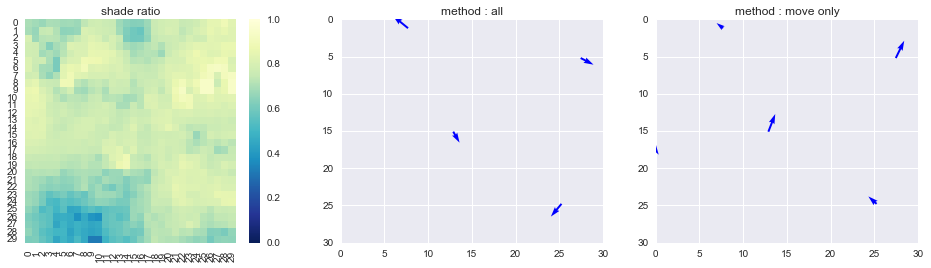

In [69]:
vis_move(paramss_child=paramss[0])